## NETFLIX STOCK PRICE PREDICTION

### IMPORTING LIBRARIES

In [67]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVR

from sklearn.linear_model import LinearRegression


### READING DATA

In [47]:
data=pd.read_csv(r"C:\Users\kirth\OneDrive\Desktop\NFLX.csv")

In [48]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [49]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [50]:
data.shape

(1009, 7)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [52]:
df=data[['Adj Close']]
df.head()

,Adj Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [53]:
forecast_out=30
df['Prediction']=df[['Adj Close']].shift(-forecast_out)
print(df.tail())

       Adj Close  Prediction
1004  427.140015         NaN
1005  457.130005         NaN
1006  429.480011         NaN
1007  405.600006         NaN
1008  410.170013         NaN


C:\Users\kirth\AppData\Local\Temp\ipykernel_2748\2832022938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction']=df[['Adj Close']].shift(-forecast_out)


In [56]:
X = np.array(df.drop(['Prediction'], axis=1))  # Drop the 'Prediction' column along axis 1 (columns)
X = X[:-forecast_out]  # Slice the array to exclude the last forecast_out rows
print(X)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

In [57]:
Y=np.array(df['Prediction'])
Y = Y[:-forecast_out]
Y

array([317.5     , 316.480011, 306.700012, 300.940002, 320.350006,
       300.690002, 285.769989, 295.350006, 280.290009, 283.670013,
       288.940002, 293.970001, 288.850006, 289.929993, 298.070007,
       303.670013, 309.25    , 311.649994, 307.779999, 336.059998,
       334.519989, 332.700012, 327.769989, 318.690002, 307.019989,
       305.76001 , 313.980011, 311.76001 , 312.459991, 313.299988,
       313.359985, 311.690002, 320.089996, 326.26001 , 326.890015,
       330.299988, 329.600006, 326.459991, 328.529999, 326.130005,
       328.190002, 325.220001, 324.179993, 331.820007, 331.619995,
       344.720001, 349.290009, 351.290009, 349.730011, 353.540009,
       351.600006, 359.929993, 361.809998, 365.799988, 367.450012,
       361.399994, 360.570007, 361.450012, 363.829987, 379.929993,
       392.869995, 391.980011, 390.399994, 404.980011, 416.76001 ,
       415.440002, 411.089996, 384.480011, 399.390015, 390.390015,
       395.420013, 391.429993, 398.179993, 390.519989, 398.390

## SPLITING THE DATA

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [63]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test1 = pd.DataFrame(X_test_scaled)

### USING SVR (SUPPORT VECTOR REGRESSION) METHOD

In [68]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(X_train1, Y_train)

SVR(C=1000.0, gamma=0.1)

In [69]:
svm_confidence=svr_rbf.score(X_test1,Y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.8298103806582658


## USING LINEAR REGRESSION METHOD

In [70]:
from sklearn.linear_model import LinearRegression
# Create and train the Linear Regression  Model
lr = LinearRegression()


LinearRegression()

In [71]:
# Train the model
lr.fit(X_train, Y_train)

LinearRegression()

In [72]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(X_test, Y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.8326175150567546


## GBR (Gradient Boosting Regression)

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [84]:

gbr= ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')

In [85]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [86]:
gbr.score(X_train, Y_train)


0.9845605013258207

In [88]:
x_forecast = np.array(df.drop(['Prediction'],axis=1))[-forecast_out:]
print(x_forecast)


[[614.090027]
 [613.119995]
 [610.710022]
 [610.539978]
 [612.090027]
 [602.440002]
 [597.369995]
 [591.150024]
 [567.52002 ]
 [553.289978]
 [541.059998]
 [539.849976]
 [540.840027]
 [537.219971]
 [519.200012]
 [525.690002]
 [510.799988]
 [515.859985]
 [508.25    ]
 [397.5     ]
 [387.149994]
 [366.420013]
 [359.700012]
 [386.700012]
 [384.359985]
 [427.140015]
 [457.130005]
 [429.480011]
 [405.600006]
 [410.170013]]


In [90]:
#SVR
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

#Linear Regression
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)


#GBR
gbr_prediction=gbr.predict(x_forecast)
print(gbr_prediction)

[351.14099078 351.14099078 351.14099078 351.14099078 351.14099078
 351.14099078 351.14099078 351.14099078 351.14099078 351.14099078
 351.14099078 351.14099078 351.14099078 351.14099078 351.14099078
 351.14099078 351.14099078 351.14099078 351.14099078 351.14099078
 351.14099078 351.14099078 351.14099078 351.14099078 351.14099078
 351.14099078 351.14099078 351.14099078 351.14099078 351.14099078]
[597.83136873 596.97075403 594.83262026 594.68175682 596.05696398
 587.49543887 582.99731661 577.47894356 556.51434786 543.88942079
 533.03895347 531.96541908 532.84379468 529.63207239 513.64472195
 519.4026565  506.1922007  510.68144206 503.92984529 405.67218213
 396.48963222 378.09794382 372.13594296 396.09040712 394.0143296
 431.96887387 458.57606426 434.04492388 412.8585267  416.91304777]
[421.24795661 507.83715763 392.37762227 653.57377142 374.16792301
 516.48960439 643.47852812 675.52343366 498.1389491  623.17121188
 549.69692987 494.64166273 549.69692987 546.28635034 572.65243014
 532.2169

### USING MINMAXSCALER

In [91]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train1 = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test1 = pd.DataFrame(X_test_scaled)

In [ ]:
### find Root mean Square Error(rmse)

In [93]:
rmse_val = [] #to store rmse(root mean squared error) values for different k
for K in range(20):
    K = K+1
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn_model.fit(X_train1, Y_train)  #fit the model
    pred=knn_model.predict(X_test1) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 52.64365380361508
RMSE value for k=  2 is: 46.529959169351564
RMSE value for k=  3 is: 45.27856132780196
RMSE value for k=  4 is: 44.01300445944673
RMSE value for k=  5 is: 44.12004779560173
RMSE value for k=  6 is: 43.37151620442281
RMSE value for k=  7 is: 42.63866465397025
RMSE value for k=  8 is: 42.52795825646853
RMSE value for k=  9 is: 42.86877100967428
RMSE value for k=  10 is: 43.2771659298092
RMSE value for k=  11 is: 42.940008590384586
RMSE value for k=  12 is: 42.572989937662186
RMSE value for k=  13 is: 41.4551067011594
RMSE value for k=  14 is: 41.462662352924795
RMSE value for k=  15 is: 41.56437533725232
RMSE value for k=  16 is: 41.68710768073509
RMSE value for k=  17 is: 41.59198289586137
RMSE value for k=  18 is: 41.81768206359895
RMSE value for k=  19 is: 41.59879273338547
RMSE value for k=  20 is: 41.4331956269836


### Plotting the rmse values against K values

<Axes: >

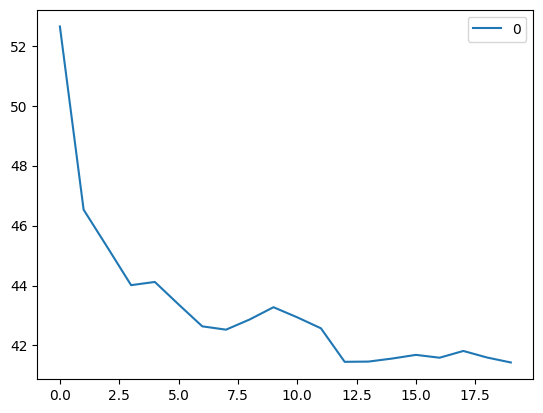

In [94]:
#plotting the rmse values against k values where k value refer to nearest neighbours for good prediction

curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [95]:
pred

array([530.0094988 , 526.31950075, 588.2205033 , 315.22449945,
       592.61550295, 320.2185012 , 600.30350355, 351.03100365,
       346.26799775, 300.3089981 , 347.5150008 , 563.53249825,
       324.4610016 , 309.94499975, 353.8364975 , 525.6265044 ,
       365.38600155, 381.67549735, 367.009497  , 346.7849975 ,
       365.38600155, 361.19649805, 523.59750055, 349.76800315,
       356.76799915, 364.9095002 , 517.21650075, 532.8069964 ,
       592.61550295, 533.93999475, 353.8364975 , 345.8164978 ,
       359.6955009 , 550.0924973 , 495.11599885, 352.33100115,
       359.0065001 , 520.1265014 , 504.92249765, 321.16000055,
       313.03450015, 511.16400295, 422.1150009 , 592.61550295,
       358.9720016 , 309.61750175, 321.48799895, 345.912001  ,
       316.5919998 , 361.7289993 , 325.00849915, 541.9274948 ,
       310.62500145, 545.88450035, 393.9394988 , 600.4460022 ,
       542.53399985, 309.61750175, 572.7990036 , 525.3995025 ,
       361.84399875, 528.6734972 , 353.95550075, 560.57

In [ ]:
# knn refers to  k-nearest neighbors.

In [96]:
knn_model.score(X_train1, Y_train)

0.8439236676401547

## CROSS VALIDATION

In [98]:
train, validation = train_test_split(df, test_size=0.50, random_state = 5)

In [99]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [100]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [104]:
scores = []
best_svr = SVR(kernel='rbf')
gbr= ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'squared_error')
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, Y_train, Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    best_svr.fit(X_train, Y_train)
    scores.append(best_svr.score(X_test, Y_test))

Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  60  61  62  64  65  68  69  71  72  73  74  75  77  78  79  80
  81  82  83  84  85  87  89  90  91  92  93  94  95  97  98  99 100 101
 102 103 104 105 106 108 109 110 111 112 113 114 115 116 117 118 119 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 200 201 202 203 204 205 206 207 208 210 211 212 214 215 216 217
 219 220 221 222 223 224 225 226 227 228 229 230 232 233 234 235 236 237
 238 239 240 241 242 243 245 246 247 248 249 250 251 252 253 254 255 256
 257 258 259 261 262 263 264 265 266 

In [108]:
best_svr.fit(X_train, Y_train)
scores.append(best_svr.score(X_test, Y_test))

In [109]:
print(np.mean(scores))

0.7491905939851871


In [110]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cross_val_score(best_svr, X, Y, cv=10)

array([-0.12704134, -1.43332874,  0.30285985, -1.10497403, -0.8690021 ,
        0.02680108, -0.56547197, -1.94567801, -0.29619558, -2.84618498])

In [111]:
cross_val_predict(best_svr, X, Y, cv=10)

array([351.04872898, 345.40267134, 345.91123481, 353.41154903,
       353.78233264, 349.08537858, 348.92134028, 345.28217584,
       340.38703411, 340.84944694, 340.84118181, 340.1963799 ,
       340.95515003, 339.1719424 , 338.1967976 , 338.50009249,
       338.41905433, 338.52478522, 338.1269613 , 340.12144293,
       343.40229556, 341.91617459, 340.64301088, 346.13946706,
       341.9634228 , 340.34367214, 342.04851562, 341.8926524 ,
       341.05796578, 339.76451232, 340.78260624, 340.50173716,
       338.58837884, 338.12263919, 341.64839919, 338.11347468,
       339.20030117, 338.13554153, 340.3819776 , 339.605059  ,
       338.7046426 , 338.20846507, 338.71678057, 338.57863586,
       338.07242934, 338.28245243, 338.95095369, 339.38006717,
       338.73020018, 348.52652812, 347.6977623 , 346.76088417,
       344.45755119, 341.12962365, 338.62859997, 338.47897081,
       339.87815941, 339.40178018, 339.54412221, 339.72449837,
       339.73778079, 339.38794253, 341.56447677, 343.82

In [115]:

scores = cross_val_score(best_svr, X, Y, cv=10)*100
print("Cross-validated scores:", scores)


Cross-validated scores: [ -12.7041344  -143.33287429   30.28598474 -110.4974026   -86.90020963
    2.68010775  -56.54719731 -194.56780127  -29.6195578  -284.61849799]


In [116]:
scaled_scores = (scores - scores.min()) / (scores.max() - scores.min()) * 100

In [117]:
print("Scaled Cross-validated scores (in percentage):", scaled_scores)

Scaled Cross-validated scores (in percentage): [ 86.3482035   44.8661837  100.          55.29330478  62.78674938
  91.23357129  72.42554908  28.59619398  80.97659899   0.        ]


##                                                           THANK YOU